In [ ]:
# Library
import pandas as pd
import numpy as np
import sys 
import os
import matplotlib.pyplot as plt
from dplython import *
    # (DplyFrame, X, diamonds, select, sift, sample_n,
    #     sample_frac, head, arrange, mutate, group_by, summarize, DelayFunction) 
from scipy.stats import linregress
from matplotlib import pyplot as plt
from IPython.display import Image
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize

import matplotlib
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import linregress
from matplotlib import rcParams
#from netCDF4 import Dataset # NC 파일을 읽기 위한 사전작업 실시
import struct
import binascii
from pyhdf.SD import SD, SDC # HDF4 읽는 라이브러리
import h5py
import cython
#import ccplot.utils
#from ccplot.hdf import *

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216 from C header, got 232 from PyObject


In [ ]:
# Library
import pandas as pd
import numpy as np
import sys 
# import iris
import os
import matplotlib.pyplot as plt
from dplython import *
    # (DplyFrame, X, diamonds, select, sift, sample_n,
    #     sample_frac, head, arrange, mutate, group_by, summarize, DelayFunction) 
from scipy.stats import linregress
from matplotlib import pyplot as plt
from IPython.display import Image
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import Normalize
import matplotlib
import matplotlib.cm as cm
import seaborn as sns
from scipy.stats import linregress
from matplotlib import rcParams
from netCDF4 import Dataset
import struct
import binascii
from mpl_toolkits.basemap import addcyclic
from netCDF4 import num2date, date2num, date2index
import datetime
from pyhdf.SD import SD, SDC
import h5py

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 16 from C header, got 96 from PyObject


In [ ]:
from google.colab import drive
from matplotlib import font_manager,rc
drive.mount('/content/drive')
print(os.getcwd())
input_path=os.getcwd()+'/drive/MyDrive/Py/corab/input_data/'
output_path=os.getcwd()+'/drive/MyDrive/Py/corab/output_data/'
rc('font', family='NanumBarunGothic') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content


In [ ]:
hdffile = input_path + 'coms_cn_geos_lonlat.hdf'
hdffile_sd = SD(hdffile, SDC.READ)

print(hdffile_sd.info())

(2, 0)


In [ ]:
lat_sds = hdffile_sd.select('Lat')
lon_sds = hdffile_sd.select('Lon')

lat2D = lat_sds.get() # get sds data
lon2D = lon_sds.get()

print(lat2D.shape,lon2D.shape)

(1544, 1934) (1544, 1934)


In [ ]:
file = input_path + 'coms_mi_le2_aod_en000ge_201910010445.h5'
h5file = h5py.File(file, 'r')

# print(list(h5file['Product/'].keys()))
print(h5file['Product/'].values())
print(h5file['Product/'].items())

ValuesViewHDF5(<HDF5 group "/Product" (3 members)>)
ItemsViewHDF5(<HDF5 group "/Product" (3 members)>)


In [ ]:
ls = list(h5file.keys())
print('list : ',ls)
h5file_aod = h5file.get(u'Product/Aerosol_Optical_Depth')
print('data : ',h5file_aod)

list :  ['Basic_Information', 'Map_Projection_Information', 'Product']
data :  <HDF5 dataset "Aerosol_Optical_Depth": shape (1544, 1934), type "<i2">


In [ ]:
attrs_key = list(h5file_aod.attrs.keys())
attrs_value = list(h5file_aod.attrs.values())

print(attrs_key)
print(attrs_value)

['Data_Type', 'Maximum', 'Minimum', 'Number_of_Bits_per_Pixel', 'Number_of_Columns', 'Number_of_Lines', 'Offset', 'Scaling_Factor', 'Undef_Code', 'Unit', 'Variable_Long_Name']
[b'STD_I16LE', 5.0, 0.0, 10, 1934, 1544, 0.0, 0.0048875855, 32767, b'.', b'Aerosol_Optical_Depth']


In [ ]:
dn = h5file['Product/Aerosol_Optical_Depth'][:]

print(dn.shape)
print(dn)

(1544, 1934)
[[32767 32767 32767 ... 32767 32767 32767]
 [32767 32767 32767 ... 32767 32767 32767]
 [32767 32767 32767 ... 32767 32767 32767]
 ...
 [32767 32767 32767 ... 32767 32767 32767]
 [32767 32767 32767 ... 32767 32767 32767]
 [32767 32767 32767 ... 32767 32767 32767]]


In [ ]:
# 2D배열을 1D로 변환

lon1D = np.reshape(lon2D, (1,np.product(lon2D.shape)))[0]
lat1D = np.reshape(lat2D, (1,np.product(lat2D.shape)))[0]

dn1D  = np.reshape(dn, (1,np.product(dn.shape)))[0]

print(lat1D.shape)
print(lon1D.shape)
print(dn1D.shape)

(2986096,)
(2986096,)
(2986096,)


In [ ]:
data =  pd.DataFrame( np.column_stack( [lat1D, lon1D, dn1D] ), columns=['lat', 'lon', 'dn'] )
data.head()

,lat,lon,dn
0,-999.0,-999.0,32767.0
1,-999.0,-999.0,32767.0
2,-999.0,-999.0,32767.0
3,-999.0,-999.0,32767.0
4,-999.0,-999.0,32767.0


In [ ]:
data_L1 = ( DplyFrame(data) >>
           mutate( val = X.dn*0.0048875855 ) >>
           sift( (0 <= X.val)  &  (X.val <= 5) ) >>
           sift( (-90 <= X.lat)  &  (X.lat <= 90) ) >>
           sift( (-180 <= X.lon)  &  (X.lon <= 360) )
          )
data_L1.head()

,lat,lon,dn,val
16619,60.692177,142.800858,16.0,0.078201
20484,60.458630,142.436798,57.0,0.278592
20492,60.492931,143.116028,47.0,0.229717
22419,60.353390,142.468307,51.0,0.249267
22425,60.378860,142.975555,45.0,0.219941


In [ ]:
print(min(data_L1.lat), max(data_L1.lat))
print(min(data_L1.lon), max(data_L1.lon))

-10.531580924987793 60.692176818847656
74.78630065917969 177.97421264648438


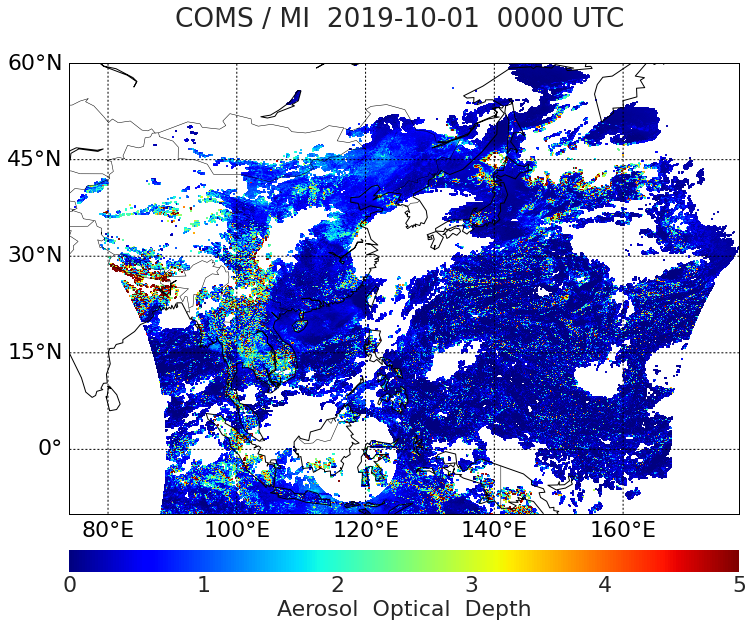

In [ ]:
%matplotlib inline
# define plot size in inches (width, height) & resolution(DPI)
plt.figure(figsize=(12, 10))

# style
plt.style.use('seaborn-darkgrid')

# define font size
plt.rc("font", size=22)
plt.rcParams['font.family'] = 'New Century Schoolbook'
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams['axes.labelsize'] = 26
# plt.rcParams['xtick.labelsize'] = 26
# plt.rcParams['ytick.labelsize'] = 26
# plt.rcParams["axes.labelweight"] = "bold"
# plt.rcParams["axes.titleweight"] = "bold"

m = Basemap(projection='cyl', lon_0=128.2, lat_0=0, 
            llcrnrlon=74, llcrnrlat=-10, 
            urcrnrlon=178, urcrnrlat=60, 
            resolution='c')

X, Y = m(data_L1.lon.values, data_L1.lat.values)
VAL = data_L1.val.values

m.scatter(X, Y, c=VAL, s=1.0, marker="s", zorder=1, vmin=0, vmax=5, cmap=plt.cm.get_cmap('jet'), alpha=1.0) 

# m.colorbar(location='right', label='Aerosol  Optical  Depth')
m.colorbar(location='bottom', label='Aerosol  Optical  Depth', pad=0.5)

# Black background
# m.drawcoastlines(color='yellow')
# m.drawcountries(color='yellow')
# m.drawmapboundary(fill_color='black')
# m.drawparallels(np.arange(-150, 120, 15), labels=[1,0,0,0], dashes=[2,2], color='yellow')
# m.drawmeridians(np.arange(-180, 180, 20), labels=[0,0,0,1], dashes=[2,2], color='yellow')

# White background
m.drawcoastlines(color='black')
m.drawcountries(color='black')
m.drawmapboundary(fill_color='white')
m.drawparallels(np.arange(-150, 120, 15), labels=[1,0,0,0], dashes=[2,2], color='black')
m.drawmeridians(np.arange(-180, 180, 20), labels=[0,0,0,1], dashes=[2,2], color='black')

plt.title('COMS / MI  2019-10-01  0000 UTC \n')
# plt.title('ECMWF / ERA : %04d-%02d \n' %( data_L1.year[0].astype('int'), data_L1.month[0].astype('int') )  )
plt.show()